<h2><center>Nouralden Mohammed<br>
<br>
Finacial Math<br>
<br>
Assignment 3
</center> </h2>

### Importin the packages

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

# Keras imports
from keras.models import Sequential
from keras.layers import Dense


# LSTM 
from keras.layers import LSTM
#Ignoring the warining
import warnings
%matplotlib inline

Using TensorFlow backend.


In [2]:
warnings.filterwarnings('ignore')

## 1-Reading Hong Kong Exchanges and Clearing Limited as (HKXCY)

In [3]:
data=pd.read_csv('HKXCY.csv',index_col=0)

## 2-Removing unnecessary columns, and using the same dataframe for the remaining tasks

In [4]:
data.drop(['Adj Close','Volume'],inplace=True,axis=1)


In [5]:
data.head()

,Open,High,Low,Close
Date,,,,
2018-01-02,31.680000,32.099998,31.680000,32.099998
2018-01-03,32.150002,32.150002,32.009998,32.099998
2018-01-04,32.980000,32.980000,32.650002,32.820000
2018-01-05,32.990002,32.990002,32.520000,32.590000
2018-01-08,33.410000,33.770000,33.360001,33.669998


In [6]:
data.shape

(251, 4)

### ploting the original data

Text(0,0.5,'Prices')

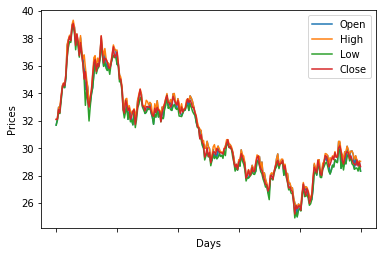

In [7]:
data.plot()
plt.xlabel('Days')
plt.ylabel('Prices')

### 3- scaling the data using MinMaxScaler using the range (-1,1)

In [8]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [9]:
data = scaler.fit_transform(data)

In [10]:
data[:5]

array([[-0.0450323 , -0.05632802, -0.03290429, -0.00647984],
       [ 0.02215882, -0.04901214,  0.01430572, -0.00647984],
       [ 0.1408147 ,  0.07242136,  0.10586565,  0.09719216],
       [ 0.14224458,  0.07388471,  0.08726737,  0.06407481],
       [ 0.20228718,  0.18800293,  0.20743917,  0.21958209]])

### ploting the scalled data

No handles with labels found to put in legend.


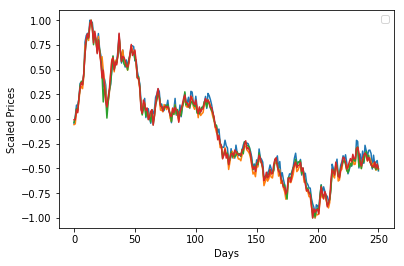

In [11]:
plt.plot(data)
plt.xlabel('Days')
plt.ylabel('Scaled Prices')
plt.legend()

### 4- splitting the data into training and testing data

In [13]:
train_size = int(len(data) * 0.80)


test_size = len(data) - train_size


train, test = data[0:train_size,:], data[train_size:len(data),:]

In [14]:
print('variance of the data {}\nvariance of the train data {}\nvariance of the test data {}'.format(data.var(),train.var(),test.var()))

variance of the data 0.22046080625786887
variance of the train data 0.2162910254960167
variance of the test data 0.02907566819200162


### The size of training and testing


<html>
<head>
<style>
p.a{
  font-family: "Times New Roman", Times, serif;
}

p.b{
  font-family: Arial, Helvetica, sans-serif;
}
</style>
</head>
<body>


<p class="a"><h> Regarding this point, there are many debates about the size of training and testing data.  It depends on several factors; the complexity of the problem and the complexity of the algorithm. In some situations, we need to consult domain expertise, or using a statistical heuristic. 
<br><br>
 But I can give my reason in brief words. If the size of the training data is very small ($<60\%$), it will results in high variance for testing purpose.
<br><br>
So, we used the size of training data to be $80\%$, the remaining $20\%$ for testing purpose, which give me reasonable error as we will see:
<br><br>
Train Score: 0.09 RMSE
<br><br>
Test Score: 0.10 RMSE
</p>



</body>
</html>

### 5- Rolling and reshaping the data 

In [15]:
def create_dataset(dataset, look_back=10):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    return np.array(dataX), np.array(dataY)

In [16]:
look_back = 10

# Split the data into training features and training targets
trainX, trainY = create_dataset(train, look_back)

# Split the data into testing features and testing targets
testX, testY = create_dataset(test, look_back)

In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 4))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 4))

In [18]:
print('Train X shape ',trainX.shape)
print('Train Y shape',trainY.shape)
print('Test X shape ',testX.shape)
print('Test Y shape ',testY.shape)

Train X shape  (189, 10, 4)
Train Y shape (189, 4)
Test X shape  (40, 10, 4)
Test Y shape  (40, 4)


# 6-Training and testing using a Stateful LSTM mode Stateful model

In the stateless LSTM configuration, <b>internal state is reset after each training batch</b> or each batch when making predictions.

In [19]:
# Define the model in Keras
model = Sequential()

In [20]:
# This is how we add an LSTM cell. (We can stack multiple cells on top of each other by repeating this line)
model.add(LSTM(8, batch_input_shape=(1, 10, 4), stateful=True))

In [21]:
# We have to add a fully connected layer of the LSTM to output the predictions. Here we only have 1 node because
# our time-series prediction is expecting one output. 
model.add(Dense(4))

In [22]:
# We define our loss function. Here since we are dealing with numerical data, one option is to use mean squared error.
model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
# Check the number of parameters. Always a good idea to take a look at the model from Keras' point of view
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 8)                    416       
_________________________________________________________________
dense_1 (Dense)              (1, 4)                    36        
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________


In [24]:
for i in range(20):
    model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=2, shuffle=False)
    model.reset_states()
# Estimate model performance

Epoch 1/1
 - 1s - loss: 0.0623
Epoch 1/1
 - 1s - loss: 0.0287
Epoch 1/1
 - 1s - loss: 0.0251
Epoch 1/1
 - 1s - loss: 0.0227
Epoch 1/1
 - 1s - loss: 0.0205
Epoch 1/1
 - 1s - loss: 0.0185
Epoch 1/1
 - 1s - loss: 0.0168
Epoch 1/1
 - 1s - loss: 0.0152
Epoch 1/1
 - 1s - loss: 0.0139
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0117
Epoch 1/1
 - 1s - loss: 0.0109
Epoch 1/1
 - 1s - loss: 0.0103
Epoch 1/1
 - 1s - loss: 0.0098
Epoch 1/1
 - 1s - loss: 0.0093
Epoch 1/1
 - 1s - loss: 0.0090
Epoch 1/1
 - 1s - loss: 0.0087
Epoch 1/1
 - 1s - loss: 0.0084
Epoch 1/1
 - 1s - loss: 0.0082
Epoch 1/1
 - 1s - loss: 0.0080


### 7- Plotting

In [28]:
# generate predictions for training
trainPredict = model.predict(trainX, batch_size=1)
testPredict = model.predict(testX, batch_size=1)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict

### The training and testing losses sccores.

In [29]:
trainScore = model.evaluate(trainX, trainY, batch_size=1, verbose=0)
model.reset_states()
trainScore = math.sqrt(trainScore)


testScore = model.evaluate(testX, testY, batch_size=1, verbose=0)
model.reset_states()
testScore = math.sqrt(testScore)
print('Train Score: %.2f ' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f ' % (testScore))

Train Score: 0.09 
Test Score: 0.10 


### Scores using Rooted mean squared error

In [30]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.09 RMSE
Test Score: 0.10 RMSE


### Plotting for Open Price

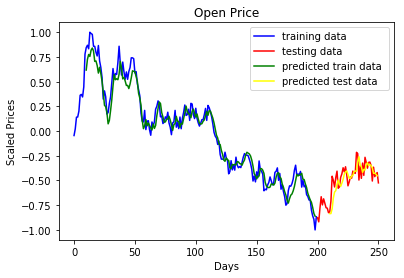

In [31]:
#plt.plot(data[:,0],label='scaled data')
plt.plot(range(train_size),data[:train_size,0],label='training data ', color='blue')
plt.plot(range(train_size, train_size+test_size, 1), data[train_size:,0],label='testing data ', color='red')
plt.plot(trainPredictPlot[:,0],label='predicted train data ', color='green')
plt.plot(testPredictPlot[:,0],label='predicted test data', color='yellow')
plt.legend()
plt.title('Open Price')
plt.xlabel('Days')
plt.ylabel('Scaled Prices')
plt.show()

### Plotting for High Price

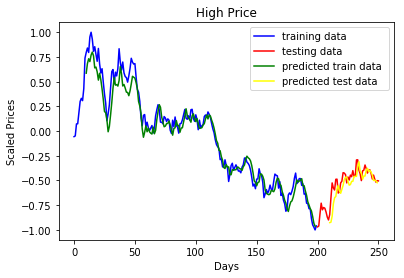

In [32]:
#plt.plot(data[:,0],label='scaled data')
plt.plot(range(train_size),data[:train_size,1],label='training data ', color='blue')
plt.plot(range(train_size, train_size+test_size, 1), data[train_size:,1],label='testing data ', color='red')
plt.plot(trainPredictPlot[:,1],label='predicted train data ', color='green')
plt.plot(testPredictPlot[:,1],label='predicted test data', color='yellow')
plt.legend()
plt.title('High Price')
plt.xlabel('Days')
plt.ylabel('Scaled Prices')
plt.show()

### Plotting for Low Price

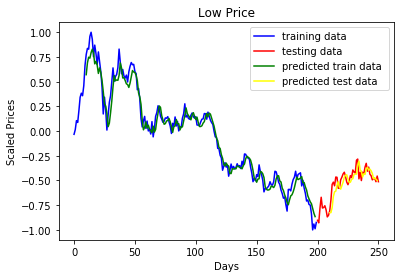

In [33]:
#plt.plot(data[:,0],label='scaled data')
plt.plot(range(train_size),data[:train_size,2],label='training data ', color='blue')
plt.plot(range(train_size, train_size+test_size, 1), data[train_size:,2],label='testing data ', color='red')
plt.plot(trainPredictPlot[:,2],label='predicted train data ', color='green')
plt.plot(testPredictPlot[:,2],label='predicted test data', color='yellow')
plt.legend()
plt.title('Low Price')
plt.xlabel('Days')
plt.ylabel('Scaled Prices')
plt.show()

### Plotting for Close Price

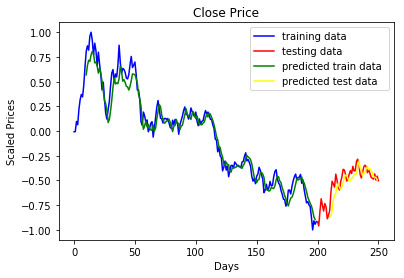

In [34]:
#plt.plot(data[:,0],label='scaled data')
plt.plot(range(train_size),data[:train_size,3],label='training data ', color='blue')
plt.plot(range(train_size, train_size+test_size, 1), data[train_size:,3],label='testing data ', color='red')
plt.plot(trainPredictPlot[:,3],label='predicted train data ', color='green')
plt.plot(testPredictPlot[:,3],label='predicted test data', color='yellow')
plt.legend()
plt.title('Close Price')
plt.xlabel('Days')
plt.ylabel('Scaled Prices')
plt.show()

## 8- Redoing number 7 by reverting the scalled data into original data

In [35]:
data1= scaler.inverse_transform(data)

In [36]:
trainPredict1 = scaler.inverse_transform(trainPredict)

testPredict1 = scaler.inverse_transform(testPredict)


In [37]:
trainPredictPlot1 = np.empty_like(data1)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(trainPredict1)+look_back, :] = trainPredict1

# shift test predictions for plotting
testPredictPlot1 = np.empty_like(data1)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[len(trainPredict1)+(look_back*2)+1:len(data1)-1, :] = testPredict1

In [39]:
trainY1= scaler.inverse_transform(trainY)
testY1= scaler.inverse_transform(testY)

In [40]:
# calculate root mean squared error
trainScore1 = math.sqrt(mean_squared_error(trainY1, trainPredict1))
print('Train Score: %.2f RMSE' % (trainScore1))
testScore1 = math.sqrt(mean_squared_error(testY1, testPredict1))
print('Test Score: %.2f RMSE' % (testScore1))

Train Score: 0.66 RMSE
Test Score: 0.66 RMSE


### Open Price

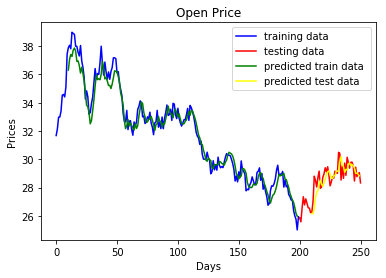

In [41]:
plt.plot(range(train_size),data1[:train_size,0],label='training data ', color='blue')
plt.plot(range(train_size, train_size+test_size, 1), data1[train_size:,0],label='testing data ', color='red')
plt.plot(trainPredictPlot1[:,0],label='predicted train data ', color='green')
plt.plot(testPredictPlot1[:,0],label='predicted test data', color='yellow')
plt.legend()
plt.title('Open Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.show()

### High price

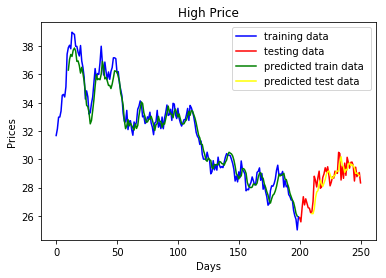

In [42]:
plt.plot(range(train_size),data1[:train_size,0],label='training data ', color='blue')
plt.plot(range(train_size, train_size+test_size, 1), data1[train_size:,0],label='testing data ', color='red')
plt.plot(trainPredictPlot1[:,0],label='predicted train data ', color='green')
plt.plot(testPredictPlot1[:,0],label='predicted test data', color='yellow')
plt.legend()
plt.title('High Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.show()

### Low price

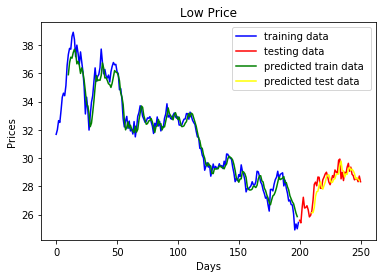

In [43]:
plt.plot(range(train_size),data1[:train_size,2],label='training data ', color='blue')
plt.plot(range(train_size, train_size+test_size, 1), data1[train_size:,2],label='testing data ', color='red')
plt.plot(trainPredictPlot1[:,2],label='predicted train data ', color='green')
plt.plot(testPredictPlot1[:,2],label='predicted test data', color='yellow')
plt.legend()
plt.title('Low Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.show()

### Close price

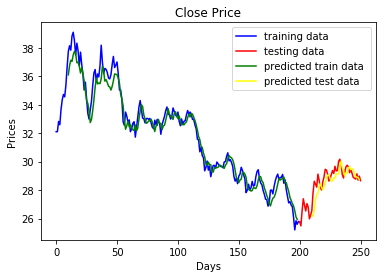

In [44]:
plt.plot(range(train_size),data1[:train_size,3],label='training data ', color='blue')
plt.plot(range(train_size, train_size+test_size, 1), data1[train_size:,3],label='testing data ', color='red')
plt.plot(trainPredictPlot1[:,3],label='predicted train data ', color='green')
plt.plot(testPredictPlot1[:,3],label='predicted test data', color='yellow')
plt.legend()
plt.title('Close Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.show()